<a href="https://colab.research.google.com/github/ArmanAghania/Data-Analysis-Concepts-done-with-Python/blob/main/Intermidiary_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries, Directory, Data

In [ ]:
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Intermediary Statistics

/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Intermediary Statistics


In [ ]:
#Dependencies

import pandas as pd
import scipy.stats as st
import math as m
import statsmodels.stats.api as sm

In [ ]:
#Load Data
df = pd.read_csv('Wine-quality-challenge.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#Normal Distribution

<Axes: ylabel='Density'>

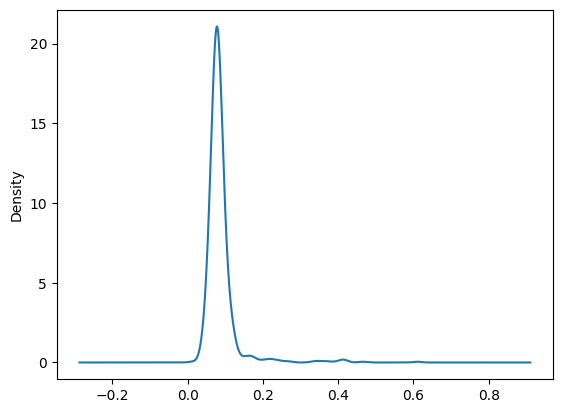

In [ ]:
#Density Plot of Chlorides

df.chlorides.plot.density()

In [ ]:
#Check the # of observations within 1 Standard Deviations
df.loc[(df.chlorides <= df.chlorides.mean() + 1 * df.chlorides.std()) &
       (df.chlorides >= df.chlorides.mean() - 1 * df.chlorides.std())].chlorides.count()/df.chlorides.count()

0.9480925578486554

In [ ]:
#Check the # of observations within 2 Standard Deviations
df.loc[(df.chlorides <= df.chlorides.mean() + 2 * df.chlorides.std()) &
       (df.chlorides >= df.chlorides.mean() - 2 * df.chlorides.std())].chlorides.count()/df.chlorides.count()

0.9718574108818011

In [ ]:
#Check the # of observations within 3 Standard Deviations
df.loc[(df.chlorides <= df.chlorides.mean() + 3 * df.chlorides.std()) &
       (df.chlorides >= df.chlorides.mean() - 3 * df.chlorides.std())].chlorides.count()/df.chlorides.count()

0.9806128830519074

<Axes: ylabel='Density'>

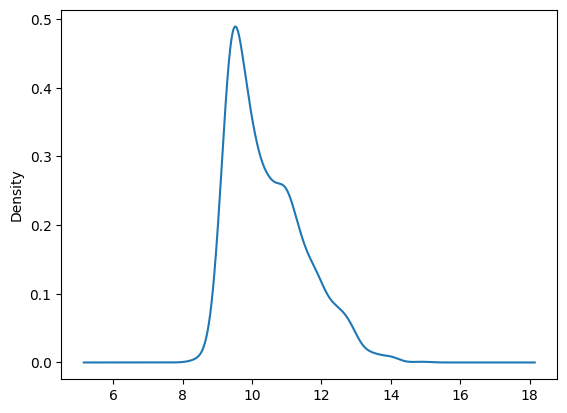

In [ ]:
#Plot alcohol Density Distribution
df.alcohol.plot.density()

In [ ]:
#Share of observations within 1 Standard Decviations of Alcohol
df.loc[(df.alcohol <= df.alcohol.mean() + 1 * df.alcohol.std()) &
       (df.alcohol >= df.alcohol.mean() - 1 * df.alcohol.std())].alcohol.count()/df.alcohol.count()

0.7035647279549718

In [ ]:
#Share of observations within 2 Standard Decviations of Alcohol
df.loc[(df.alcohol <= df.alcohol.mean() + 2 * df.alcohol.std()) &
       (df.alcohol >= df.alcohol.mean() - 2 * df.alcohol.std())].alcohol.count()/df.alcohol.count()

0.9562226391494684

In [ ]:
#Share of observations within 3 Standard Decviations of Alcohol
df.loc[(df.alcohol <= df.alcohol.mean() + 3 * df.alcohol.std()) &
       (df.alcohol >= df.alcohol.mean() - 3 * df.alcohol.std())].alcohol.count()/df.alcohol.count()

0.9949968730456535

#Shapiro-Wilks Test

In [ ]:
#Shapiro-Wilks Test for Normality
stat, p_value = st.shapiro(df.chlorides)
print(p_value)

if p_value > 0.05:
  print('Sample looks Gaussian/Normal (Failed to Reject H0)')
else:
  print('Sample Does NOT look Gaussian/Normal (Reject H0)')

0.0
Sample Does NOT look Gaussian/Normal (Reject H0)


In [ ]:
#Shapiro-Wilks Test for Sulphates
stat, p_value = st.shapiro(df.sulphates)
print(p_value)

if p_value > 0.05:
  print('Sample looks Gaussian/Normal (Failed to Reject H0)')
else:
  print('Sample Does NOT look Gaussian/Normal (Reject H0)')



5.821617678881608e-38
Sample Does NOT look Gaussian/Normal (Reject H0)


#Standard Error

In [ ]:
#Using a Function
st.sem(df.alcohol)

0.026650018979018173

In [ ]:
#Doing the Computation: Standard Deviation divided by square root of observations
df.alcohol.std() / m.sqrt(df.alcohol.count())

0.026650018979018173

In [ ]:
#Standard Error of PH
st.sem(df.pH)

0.0038608683325203784

#Confidence Interval

In [ ]:
#Confidence interval of the mean of citric acid
print(df[['citric acid']].mean())

st.norm.interval(alpha = 0.95,
                 loc = df[['citric acid']].mean(),
                 scale = st.sem(df[['citric acid']]))

citric acid    0.270976
dtype: float64


<ipython-input-42-c3eda0be4453>:4: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  st.norm.interval(alpha = 0.95,


(array([0.26142755]), array([0.28052367]))

array([[<Axes: title={'center': 'citric acid'}>]], dtype=object)

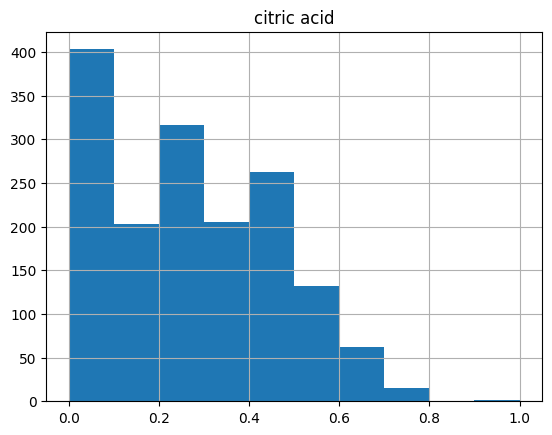

In [ ]:
#Histogram
df[['citric acid']].hist()

In [ ]:
#Confidence interval of the mean of Density
print(df.density.mean())

st.norm.interval(alpha = 0.95,
                 loc = df.density.mean(),
                 scale = st.sem(df.density))

0.9967466791744841


<ipython-input-44-e8e71d2132ae>:4: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  st.norm.interval(alpha = 0.95,


(0.9966541725972521, 0.9968391857517162)

<Axes: >

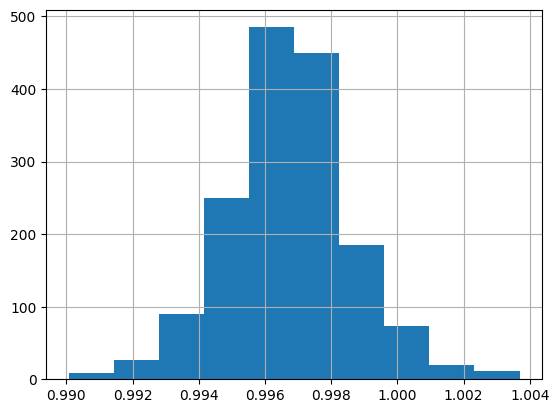

In [ ]:
#Histogram
df.density.hist()

#T-test
* T-test is used for continuos variables

In [ ]:
data = pd.read_csv('stackoverflow.csv')
data.head()

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,Data_scientist,Database_administrator,...,Developer_with_stats_math_background,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer
0,United Kingdom,100000.000000,20,0,1,5000,Remote,8,0,0,...,0,0,1,0,0,0,0,0,0,0
1,United States,130000.000000,20,1,1,1000,Remote,9,0,0,...,0,1,1,0,0,0,0,1,0,1
2,United States,175000.000000,16,0,1,10000,Not remote,7,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Germany,64516.129030,4,0,0,1000,Not remote,9,0,0,...,0,0,0,0,0,0,0,0,0,1
4,India,6636.323594,1,0,1,5000,Not remote,5,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#Subset

salary_uk = data.loc[data.Country == 'United Kingdom'].Salary
salary_de = data.loc[data.Country == 'Germany'].Salary

In [ ]:
stat, p_value = st.ttest_ind(a = salary_uk, b = salary_de)

print(stat, p_value)

if p_value > 0.05:
  print('Both countries have similar salaries (Fail to Reject H0)')
else:
  print('There is a difference in salaries (Reject H0)')

2.2222769691089583 0.026389999555203502
There is a difference in salaries (Reject H0)


<Axes: >

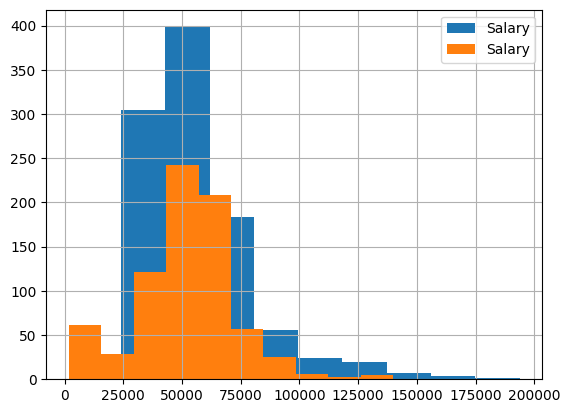

In [ ]:
#Histograms
salary_uk.hist(legend = True)
salary_de.hist(legend = True)

In [ ]:
#T-test in experience between India and United States

xp_in = data.loc[data.Country == 'India'].YearsCodedJob
xp_us = data.loc[data.Country == 'United States'].YearsCodedJob


stat, p_value = st.ttest_ind(a = xp_in, b = xp_us)

print(stat, p_value)

if p_value > 0.05:
  print('Both countries have similar Experiences (Fail to Reject H0)')
else:
  print('There is a difference in Experiences (Reject H0)')

-16.372922047831 5.225676347614714e-58
There is a difference in Experiences (Reject H0)


<Axes: >

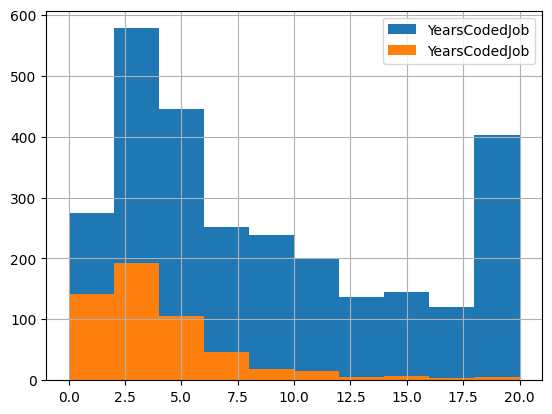

In [ ]:
#Histograms
xp_us.hist(legend = True)
xp_in.hist(legend = True)


#Chi-square test
* Chi-square test is used for categorical variables

In [ ]:
#Cross Tabulation
tab = pd.crosstab(index = data.Country,
                  columns = data.Remote)
tab

Remote,Not remote,Remote
Country,,
Canada,457,28
Germany,717,40
India,482,56
United Kingdom,953,70
United States,2410,381


In [ ]:
#Chi-square test
chi2, p_value, dof, exp = st.chi2_contingency(tab)

print(p_value)

if p_value > 0.05:
  print('There is no relationship (Fail to Reject H0)')
else:
  print('There is a strong relationship (Reject H0)')

3.321120877301216e-16
There is a strong relationship (Reject H0)


In [ ]:
#Chi-square test between company-size and hobbies

tab = pd.crosstab(index = data.CompanySizeNumber,
                  columns = data.Hobby)

chi2, p_value, dof, exp = st.chi2_contingency(tab)

print(p_value)

if p_value > 0.05:
  print('There is no relationship (Fail to Reject H0)')
else:
  print('There is a strong relationship (Reject H0)')

0.025708455559671047
There is a strong relationship (Reject H0)
